This notebook explores the ECG image dataset, visualizes representative samples, and inspects image quality, resolution, and artifacts.

In [7]:
import numpy as np
import cv2
import torch

print("NumPy OK")
print("OpenCV OK")
print("Torch OK")


NumPy OK
OpenCV OK
Torch OK


In [8]:
import pandas as pd

df = pd.read_csv("/Users/rydentamura/Desktop/projects/ecg-projectdata/train.csv")
df.head()


,id,fs,sig_len
0,7663343,500,5000
1,10140238,1000,10000
2,11842146,1000,10000
3,19030958,250,2500
4,19585145,512,5120


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

# pull data path
data_path = Path("/Users/rydentamura/Desktop/projects/ecg-projectdata")

print("Data folder exists:", data_path.exists())

#check downloaded files access
train_dir = data_path / "train"

local_ids = [folder.name for folder in train_dir.iterdir() if folder.is_dir()]

print("Local IDs downloaded:", local_ids)


Data folder exists: True
Local IDs downloaded: ['1006867983', '1006427285', '1012423188']


In [12]:
#select one of downlaoded ids 
sample_id = local_ids[0]  
sample_id

#show file pngs
folder = train_dir / sample_id
image_files = sorted(folder.glob("*.png"))

print("Image files for this ID:")
for f in image_files:
    print(f.name)


Image files for this ID:
1006867983-0001.png
1006867983-0003.png
1006867983-0004.png


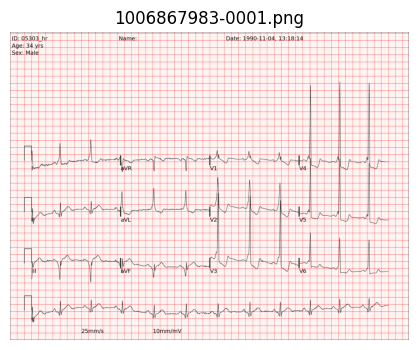

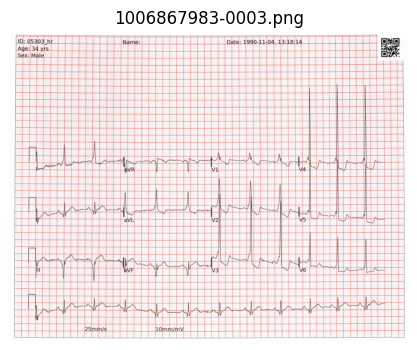

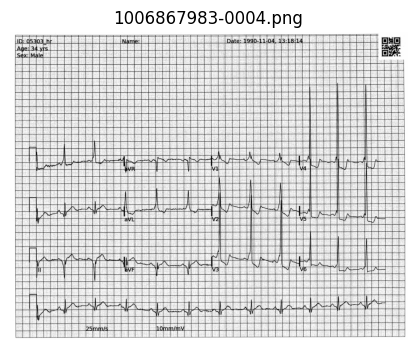

In [13]:
#load image helper 
def show_image(path, title=""):
    img = cv2.imread(str(path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12,4))
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")
    plt.show()

for img_path in image_files:
    show_image(img_path, title=img_path.name)


In [14]:
#every id has csv with 12-lead signals 
signal_csv = folder / f"{sample_id}.csv"
signals = pd.read_csv(signal_csv)

signals.head()


,I,II,III,aVR,aVL,aVF,V1,V2,V3,V4,V5,V6
0,0.331,-0.406,-0.738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.500,-0.693,-1.193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.429,-0.610,-1.040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.548,-0.576,-1.124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.639,-0.321,-0.961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#shape inspection
{lead: len(signals[lead]) for lead in signals.columns}


{'I': 2560,
 'II': 2560,
 'III': 2560,
 'aVR': 2560,
 'aVL': 2560,
 'aVF': 2560,
 'V1': 2560,
 'V2': 2560,
 'V3': 2560,
 'V4': 2560,
 'V5': 2560,
 'V6': 2560}

In [20]:
df[df["id"] == int(sample_id)]




,id,fs,sig_len
252,1006867983,256,2560


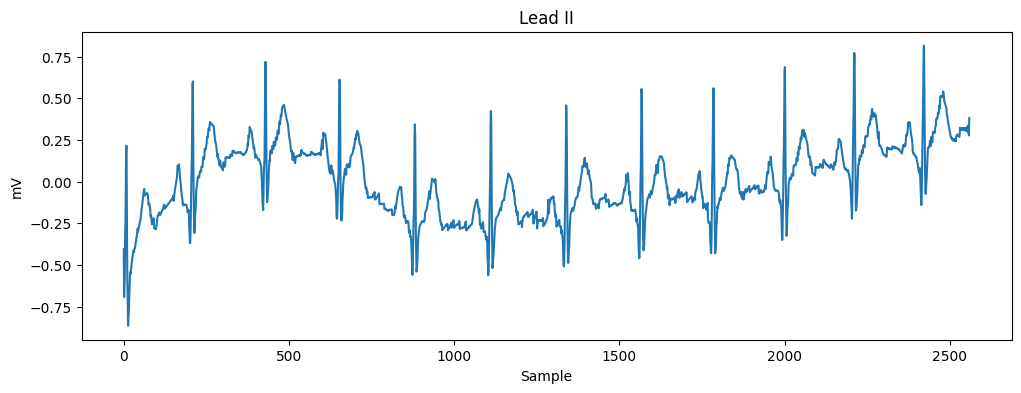

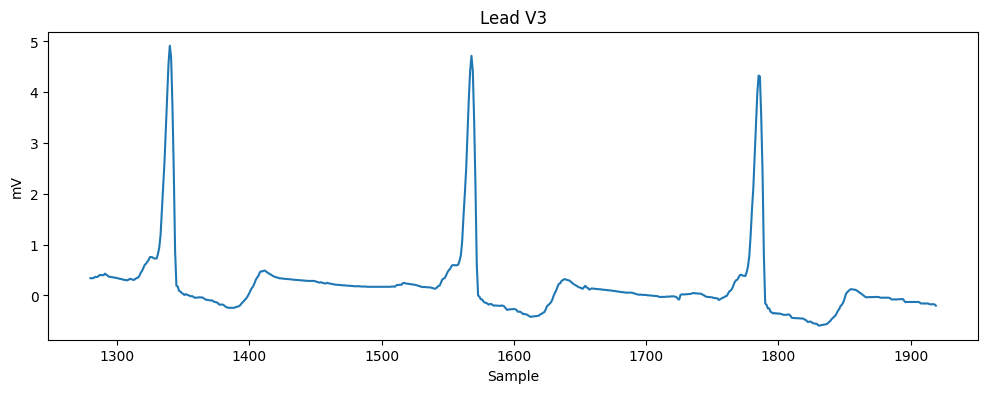

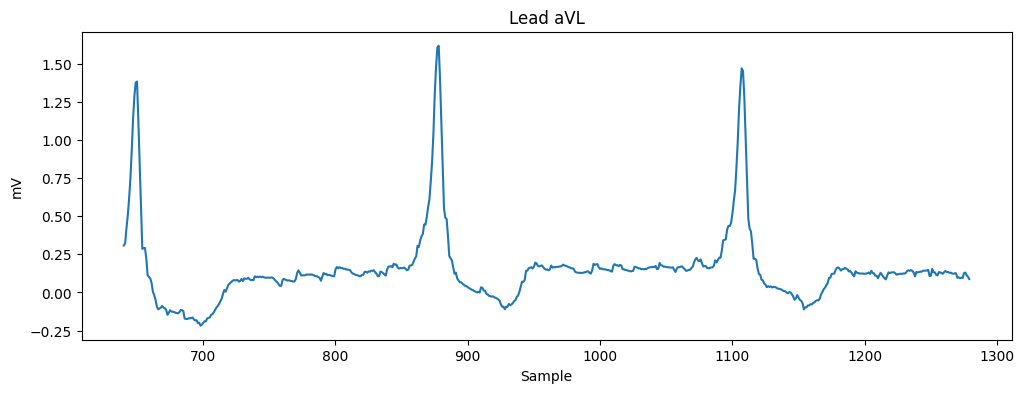

In [16]:
#plot waveforms 
def plot_lead(lead_name):
    plt.figure(figsize=(12,4))
    plt.plot(signals[lead_name])
    plt.title(f"Lead {lead_name}")
    plt.xlabel("Sample")
    plt.ylabel("mV")
    plt.show()

plot_lead("II")
plot_lead("V3")
plot_lead("aVL")
